# **Licenciatura em Ciências da Computação**

### Aprendizagem Computacional 25/26

## Types of Supervised Learning Problems

### 1. Regression
- **Target variable is continuous**
- The model predicts a numeric value
- Examples:
  - House price prediction
  - Temperature forecasting
- Common metrics:
  - Mean Squared Error (MSE)
  - Mean Absolute Error (MAE)
  - R² score

---

### 2. Binary Classification
- **Target variable has two classes**
- The model predicts one of two possible categories
- Examples:
  - Spam vs Not Spam
  - Disease vs No Disease
- Common metrics:
  - Accuracy
  - Precision / Recall
  - F1-score
  - ROC-AUC

---

### 3. Multiclass Classification
- **Target variable has more than two classes**
- The model predicts one class out of multiple categories
- Examples:
  - Handwritten digit recognition (0–9)
  - Species classification (e.g., 3 flower types)
- Common metrics:
  - Accuracy
  - Macro / Weighted Precision, Recall, F1-score

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
def drop_na_rows(df: pd.DataFrame) -> pd.DataFrame:
    """Drop rows that contain any NaNs (simple baseline)."""
    return df.dropna(axis=0).reset_index(drop=True)

df_no_na = drop_na_rows(df)
df.shape, df_no_na.shape

((20640, 10), (20433, 10))

In [ ]:
# DO NOT USE ON LABEL/y!!
def one_hot_encode_pandas(df: pd.DataFrame, drop_first: bool = False) -> pd.DataFrame:
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    print('Categorical Columns: ', cat_cols)
    return pd.get_dummies(df, columns=cat_cols, drop_first=drop_first)

df_ohe = one_hot_encode_pandas(df_no_na, drop_first=True)
df_ohe.shape

Categorical Columns:  Index(['ocean_proximity'], dtype='object')


(20433, 13)

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

def make_preprocessor(X: pd.DataFrame) -> ColumnTransformer:
    num_cols = X.select_dtypes(include=[np.number]).columns
    cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

    numeric = SimpleImputer(strategy="median")
    categorical = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ])

    return ColumnTransformer(
        transformers=[
            ("num", numeric, num_cols),
            ("cat", categorical, cat_cols),
        ],
        remainder="drop"
    )

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_true, y_pred) -> dict:
    mse = mean_squared_error(y_true, y_pred)
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mse,
        "RMSE": float(np.sqrt(mse)),
        "R2": r2_score(y_true, y_pred),
    }

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Target column in this dataset
TARGET = "median_house_value"

# Basic split
y = df[TARGET]
X = df.drop(columns=[TARGET])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build pipeline
preprocessor = make_preprocessor(X_train)

model = Pipeline([
    ("prep", preprocessor),
    ("reg", Ridge(alpha=1.0)),
])

# Train + predict
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Metrics
regression_metrics(y_test, pred)

{'MAE': 50679.19125490668,
 'MSE': 4909646504.544138,
 'RMSE': 70068.86972503651,
 'R2': 0.6253347934829572}

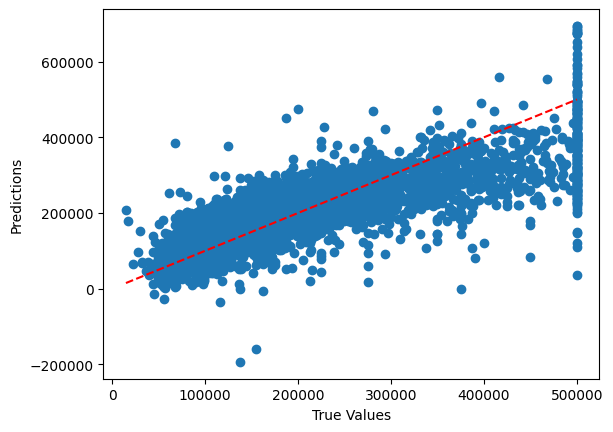

In [ ]:
#plot regression true vs predicted with red line
import matplotlib.pyplot as plt
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()